In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import sklearn as sk
import joblib
import pickle

In [2]:
today_stf= '20241022'

In [3]:
df = pd.read_csv("predict_tavi_clean.csv",index_col=0)
df.head()

,gender,country,age,hospital_state,residential_loc_pre,race,insurance,cad,prior_acute_mi,prior_cardio_surg,...,days_12mth_fup,proc_los,discharge_status_new,fup_status_12mth_new,fup_status_30d_new,upper_bound,lower_bound,death_observed,death_in_study,bmi
ID,,,,,,,,,,,,,,,,,,,,,
1,1.0,12.0,80.0,3.0,1.0,1.0,2.0,1.0,0.0,1.0,...,372.0,3.0,1.0,1.0,1.0,inf,372.0,False,False,25.806452
2,1.0,12.0,82.0,3.0,1.0,1.0,2.0,0.0,0.0,1.0,...,NaN,2.0,1.0,NaN,1.0,inf,37.0,False,False,28.326580
3,2.0,12.0,86.0,3.0,2.0,1.0,2.0,1.0,0.0,1.0,...,NaN,2.0,1.0,NaN,1.0,inf,36.0,False,False,29.061224
4,2.0,12.0,81.0,3.0,2.0,1.0,2.0,0.0,0.0,1.0,...,NaN,5.0,1.0,NaN,1.0,inf,43.0,False,False,32.432432
5,2.0,12.0,91.0,3.0,2.0,1.0,2.0,1.0,0.0,1.0,...,NaN,2.0,1.0,NaN,1.0,inf,50.0,False,False,19.470778


In [4]:
columns = [
    "gender"
    ,"country"
    ,'age'
    ,'hospital_state'
    ,'residential_loc_pre'
    ,'race'
    ,'insurance'
    ,'cad'
    ,'prior_acute_mi'
    #,'prior_acute_mi_yes'
    ,'prior_cardio_surg'
    ,'prior_pci'
    ,'prior_cabg'
    ,'prior_valve_replace'
    ,'prior_tavi'
    ,'prior_bav'
    ,'prior_af'
    ,'prior_generator'
    ,'porcelain_aorta'
    ,'prior_ccf'
    ,'prior_stroke'
    ,'prior_tia'
    ,'prior_carotid_sten'
    ,'prior_pad'
    ,'smoker'
    ,'chronic_lung'
    ,'hostile_chest'
    ,'hypertension'
    ,'diabetes'
    ,'ckd'
    ,'dialysis'
    ,'prior_radiotherapy'
    ,'long_term_steroid'
    ,'meds_ACE_ARB'
    ,'meds_xa_inibitor'
    ,'meds_aspirin'
    ,'meds_p2y12'
    ,'meds_beta_blocker'
    ,'meds_warfarin'
    ,'meds_doac'
    ,'meds_statins'
    ,'meds_diuretics'
    ,'meds_none'
    ,'nyha_status'
    ,'kccq_summ_bl'
    ,'height'
    ,'weight'
    ,'haemoglobin'
    ,'platelet_count'
    ,'albumin'
    ,'creatinine'
    ,'inr'
    ,'egfr_pre'
    ,'fev1'
    ,'ecg_rhythm_sinus'
    ,'ecg_rhythm_Fib_flutter'
    ,'ecg_rhythm_Fibrillation'
    ,'ecg_rhythm_flutter'
    ,'ecg_rhythm_paced'
    ,'ecg_rhythm_junctional'
    ,'ecg_conduct_none'
    ,'ecg_conduct_RBBB'
    ,'ecg_conduct_LBBB'
    ,'ecg_conduct_1DAVBlock'
    ,'ecg_conduct_2DAVBlock'
    ,'ecg_conduct_3DAVBlock'
    ,'ecg_conduct_Paced'
    ,'diseased_vessels_number'
    ,'lm_sten'
    ,'prox_lad'
    ,'rv_systolic'
    ,'lvef_value'
    ,'lvef_value_scale'
    ,'lv_internal_sys_dim_value'
    ,'lv_internal_dia_dim_value'
    ,'septal_wall'
    ,'posterior_wall'
    ,'av_peak_vel'
    ,'av_mean_grad_tte'
    ,'av_area_tte'
    ,'dp_index_tte_pre'
    ,'aortic_insuff'
    ,'mitral_regurg'
    ,'av_disease_etiology'
    ,'annulus_max_dim'
    ,'annulus_min_dim'
    ,'perimeter'
    ,'annulus_area_ctaort'
    ,'st_junc_diam'
    ,'valve_calc'
    ,'annualar_calc_ctaort'
    ,'valve_morph'
    ,'aortic_sinus_dim_left'
    ,'aortic_sinus_dim_right'
    ,'aortic_sinus_dim_non_coron'
    ,'ascending_ao'
    ,'lmca_height'
    ,'rca_height'
    ,'iliac_mld_left'
    ,'iliac_mld_right'
    ,'femoral_mld_left'
    ,'femoral_mld_right'
    ,'artery_calc'
    ,'iliofem_tort'
    ,'high_cfa_burif'
    #,'high_cfa_burif_yes'
    ,'prev_iliofem_interv'
    #,'prev_iliofem_interv_yes'
    ,'procedure_indic'
    #,'bio_valve_fail_reason'
    ,'valve_in_valve'
    ,'anaesthesia'
    ,'access_site'
    ,'access_method'
    ,'initial_bav'
    ,'device_manufacturer_1'
    ,'device_model_1'
    ,'sts_score'
    ,'discharge_status_new'
    ,'fup_status_30d_new'
    ,'fup_status_12mth_new'
    ,'days_death'
        ,'LOS'
    ,'days_30d_fup'
    ,'days_12mth_fup'
    ,'death_in_study'
]


    
categorical_col = [
    "gender"
    ,"country"
    ,'hospital_state'
    ,'residential_loc_pre'
    ,'race'
    ,'insurance'
    ,'cad'
    ,'prior_acute_mi'
    #,'prior_acute_mi_yes'
    ,'prior_cardio_surg'
    ,'prior_pci'
    ,'prior_cabg'
    ,'prior_valve_replace'
    ,'prior_tavi'
    ,'prior_bav'
    ,'prior_af'
    ,'prior_generator'
    ,'porcelain_aorta'
    ,'prior_ccf'
    ,'prior_stroke'
    ,'prior_tia'
    ,'prior_carotid_sten'
    ,'prior_pad'
    ,'smoker'
    ,'chronic_lung'
    ,'hostile_chest'
    ,'hypertension'
    ,'diabetes'
    ,'ckd'
    ,'dialysis'
    ,'prior_radiotherapy'
    ,'long_term_steroid'
    ,'meds_ACE_ARB'
    ,'meds_xa_inibitor'
    ,'meds_aspirin'
    ,'meds_p2y12'
    ,'meds_beta_blocker'
    ,'meds_warfarin'
    ,'meds_doac'
    ,'meds_statins'
    ,'meds_diuretics'
    ,'meds_none'
    ,'nyha_status'
    ,'ecg_rhythm_sinus'
    ,'ecg_rhythm_Fib_flutter'
    ,'ecg_rhythm_Fibrillation'
    ,'ecg_rhythm_flutter'
    ,'ecg_rhythm_paced'
    ,'ecg_rhythm_junctional'
    ,'ecg_conduct_none'
    ,'ecg_conduct_RBBB'
    ,'ecg_conduct_LBBB'
    ,'ecg_conduct_1DAVBlock'
    ,'ecg_conduct_2DAVBlock'
    ,'ecg_conduct_3DAVBlock'
    ,'ecg_conduct_Paced'
    ,'diseased_vessels_number'
    ,'lm_sten'
    ,'prox_lad'
    ,'aortic_insuff'
    ,'mitral_regurg'
    ,'lvef_value_scale'
    ,'av_disease_etiology'
    ,'valve_calc'
    ,'annualar_calc_ctaort'
    ,'valve_morph'
    ,'artery_calc'
    ,'iliofem_tort'
    ,'high_cfa_burif'
    #,'high_cfa_burif_yes'
    ,'prev_iliofem_interv'
    #,'prev_iliofem_interv_yes'
    ,'procedure_indic'
    #,'bio_valve_fail_reason'
    ,'valve_in_valve'
    ,'anaesthesia'
    ,'access_site'
    ,'access_method'
    ,'initial_bav'
    ,'device_manufacturer_1'
    ,'device_model_1'
    ,'death_in_study'
]

float_col = [x for x in columns if x not in categorical_col]



In [11]:
cont_describe = df[float_col].describe()
cont_describe = pd.concat([cont_describe,pd.DataFrame(df[float_col].isna().sum()).T]).rename(index={0:'NA'})
cont_describe.loc['NA_perc',:] = cont_describe.loc['NA',:]/df.shape[0]*100
cont_describe.to_csv("results/data/continuous_variable_summary.csv")
cont_describe

,age,kccq_summ_bl,height,weight,haemoglobin,platelet_count,albumin,creatinine,inr,egfr_pre,...,femoral_mld_left,femoral_mld_right,sts_score,discharge_status_new,fup_status_30d_new,fup_status_12mth_new,days_death,LOS,days_30d_fup,days_12mth_fup
count,16099.000000,14486.000000,16059.000000,16073.000000,15968.000000,15938.000000,14996.000000,15973.000000,11925.000000,14985.000000,...,14880.000000,14871.000000,13864.000000,16123.000000,15066.000000,8993.000000,738.000000,16072.000000,14935.000000,9039.000000
mean,81.589043,52.738851,166.581356,78.861009,126.251127,214302.666520,37.977527,106.234270,1.113156,56.477784,...,7.585090,7.607615,5.068107,1.009303,1.017191,1.093851,175.852304,50.983325,44.194510,385.522403
std,7.130857,22.882364,10.227998,18.149992,17.213143,75304.690994,4.605196,69.190946,0.254629,22.790496,...,1.784503,1.770992,4.442115,0.096008,0.129987,0.291637,169.979354,1137.466396,76.839452,90.674762
min,24.000000,0.000000,100.000000,25.000000,67.000000,25.000000,14.000000,27.000000,0.000000,0.200000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-7218.000000,-2892.000000
25%,77.000000,36.000000,160.000000,67.000000,115.000000,168000.000000,35.000000,75.000000,1.000000,42.000000,...,6.400000,6.400000,2.400000,1.000000,1.000000,1.000000,29.000000,3.000000,31.000000,363.000000
50%,82.000000,52.000000,167.000000,77.000000,127.000000,207000.000000,38.000000,91.000000,1.100000,59.000000,...,7.500000,7.550000,4.000000,1.000000,1.000000,1.000000,137.000000,4.000000,37.000000,378.000000
75%,87.000000,70.000000,175.000000,89.000000,138.000000,252000.000000,41.000000,116.000000,1.100000,75.000000,...,8.800000,8.800000,6.200000,1.000000,1.000000,1.000000,283.000000,7.000000,50.000000,410.000000
max,105.000000,100.000000,258.000000,194.000000,274.000000,980000.000000,93.000000,1061.000000,6.800000,104.000000,...,19.000000,19.300000,80.910000,2.000000,2.000000,2.000000,1171.000000,32516.000000,1374.000000,1519.000000
NA,24.000000,1637.000000,64.000000,50.000000,155.000000,185.000000,1127.000000,150.000000,4198.000000,1138.000000,...,1243.000000,1252.000000,2259.000000,0.000000,1057.000000,7130.000000,15385.000000,51.000000,1188.000000,7084.000000
NA_perc,0.148856,10.153197,0.396948,0.310116,0.961360,1.147429,6.990014,0.930348,26.037338,7.058240,...,7.709483,7.765304,14.011040,0.000000,6.555852,44.222539,95.422688,0.316318,7.368356,43.937233


In [6]:
df.query("fup_status_30d_new==1")['days_30d_fup'].describe().to_csv("results/data/fupstatus30d_days_summary.csv")

In [7]:
df.query("fup_status_12mth_new	==1")['days_12mth_fup'].describe().to_csv("results/data/fupstatus12mth_days_summary.csv")

In [8]:
df.query("death_in_study==1")['lower_bound'].describe().to_csv("results/data/deathinstudy_days_summary.csv")

In [9]:
import re
for c in categorical_col:
    df_sub = pd.concat([
        df[c].value_counts(dropna=False),
        df[c].value_counts(dropna=False,normalize=True)*100,
    ]
    ,axis=1).sort_index()
    df_sub.to_csv("results/data/" + re.sub('[^A-Za-z0-9]+', '', c) + "_summary.csv")

## Summary stats Comparison against 1year mortality and 12mnth fup

In [46]:

from scipy.stats import ttest_ind, chi2_contingency

def analyse_by_group(df, group_col, continuous_cols=None, discrete_cols=None):
    if continuous_cols is None:
        continuous_cols = df.select_dtypes(include=[np.number]).columns.difference([group_col])
    if discrete_cols is None:
        discrete_cols = df.select_dtypes(exclude=[np.number]).columns

    results = []

    for col in df.columns:
        if col == group_col:
            continue

        # Missing data stats
        missing_counts = df.groupby(group_col)[col].apply(lambda x: x.isna().sum())
        missing_props = df.groupby(group_col)[col].apply(lambda x: x.isna().mean())

        test_result = None
        group0_descr = group1_descr = None
        
        try:
            # statistical tests
            if col in continuous_cols:
                group0 = df[df[group_col] == 0][col].dropna()
                group1 = df[df[group_col] == 1][col].dropna()
                if len(group0) > 1 and len(group1) > 1:
                    t_stat, p_val = ttest_ind(group0, group1, equal_var=False)
                    test_result = ('t-test', p_val)
                    group0_descr = group0.describe().to_dict()
                    group1_descr = group1.describe().to_dict()

            elif col in discrete_cols:
                contingency = pd.crosstab(df[col], df[group_col])
                if contingency.shape[0] > 1 and contingency.shape[1] > 1:
                    chi2, p_val, _, _ = chi2_contingency(contingency)
                    test_result = ('chi2', p_val)

                # Category proportions per group
                group0_descr = df[df[group_col] == 0][col].value_counts(normalize=True, dropna=False).to_dict()
                group1_descr = df[df[group_col] == 1][col].value_counts(normalize=True, dropna=False).to_dict()

        except Exception as e:
            test_result = ('error', str(e))

        results.append({
            'column': col,
            f'missing_count_{group_col}_False': missing_counts.get(0, np.nan),
            f'missing_prop_{group_col}_False': missing_props.get(0, np.nan),
            f'missing_count_{group_col}_True': missing_counts.get(1, np.nan),
            f'missing_prop_{group_col}_True': missing_props.get(1, np.nan),
            'test_type': test_result[0] if test_result else None,
            'p_value': test_result[1] if test_result else None,
            f'{group_col}_False_summary': group0_descr,
            f'{group_col}_True_summary': group1_descr
        })

    return pd.DataFrame(results)



In [47]:
df['has_12mnth_fup'] = df['days_12mth_fup'].notna()
result_df = analyse_by_group(df,'has_12mnth_fup',float_col,categorical_col)
result_df.to_csv("results/data/summary_stat_one_year_fup.csv")

C:\Users\Harrison Nguyen\AppData\Local\Temp\ipykernel_12912\922011744.py:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'missing_count_{group_col}_False': missing_counts.get(0, np.nan),
C:\Users\Harrison Nguyen\AppData\Local\Temp\ipykernel_12912\922011744.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'missing_prop_{group_col}_False': missing_props.get(0, np.nan),
C:\Users\Harrison Nguyen\AppData\Local\Temp\ipykernel_12912\922011744.py:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame

C:\Users\Harrison Nguyen\AppData\Local\Temp\ipykernel_12912\922011744.py:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'missing_count_{group_col}_False': missing_counts.get(0, np.nan),
C:\Users\Harrison Nguyen\AppData\Local\Temp\ipykernel_12912\922011744.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'missing_prop_{group_col}_False': missing_props.get(0, np.nan),
C:\Users\Harrison Nguyen\AppData\Local\Temp\ipykernel_12912\922011744.py:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame

C:\Users\Harrison Nguyen\AppData\Local\Temp\ipykernel_12912\922011744.py:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'missing_count_{group_col}_False': missing_counts.get(0, np.nan),
C:\Users\Harrison Nguyen\AppData\Local\Temp\ipykernel_12912\922011744.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'missing_prop_{group_col}_False': missing_props.get(0, np.nan),
C:\Users\Harrison Nguyen\AppData\Local\Temp\ipykernel_12912\922011744.py:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame

C:\Users\Harrison Nguyen\AppData\Local\Temp\ipykernel_12912\922011744.py:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'missing_count_{group_col}_False': missing_counts.get(0, np.nan),
C:\Users\Harrison Nguyen\AppData\Local\Temp\ipykernel_12912\922011744.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'missing_prop_{group_col}_False': missing_props.get(0, np.nan),
C:\Users\Harrison Nguyen\AppData\Local\Temp\ipykernel_12912\922011744.py:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame

C:\Users\Harrison Nguyen\AppData\Local\Temp\ipykernel_12912\922011744.py:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'missing_count_{group_col}_False': missing_counts.get(0, np.nan),
C:\Users\Harrison Nguyen\AppData\Local\Temp\ipykernel_12912\922011744.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'missing_prop_{group_col}_False': missing_props.get(0, np.nan),
C:\Users\Harrison Nguyen\AppData\Local\Temp\ipykernel_12912\922011744.py:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame

C:\Users\Harrison Nguyen\AppData\Local\Temp\ipykernel_12912\922011744.py:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'missing_count_{group_col}_False': missing_counts.get(0, np.nan),
C:\Users\Harrison Nguyen\AppData\Local\Temp\ipykernel_12912\922011744.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'missing_prop_{group_col}_False': missing_props.get(0, np.nan),
C:\Users\Harrison Nguyen\AppData\Local\Temp\ipykernel_12912\922011744.py:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame

C:\Users\Harrison Nguyen\AppData\Local\Temp\ipykernel_12912\922011744.py:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'missing_count_{group_col}_False': missing_counts.get(0, np.nan),
C:\Users\Harrison Nguyen\AppData\Local\Temp\ipykernel_12912\922011744.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'missing_prop_{group_col}_False': missing_props.get(0, np.nan),
C:\Users\Harrison Nguyen\AppData\Local\Temp\ipykernel_12912\922011744.py:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame

C:\Users\Harrison Nguyen\AppData\Local\Temp\ipykernel_12912\922011744.py:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'missing_count_{group_col}_False': missing_counts.get(0, np.nan),
C:\Users\Harrison Nguyen\AppData\Local\Temp\ipykernel_12912\922011744.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'missing_prop_{group_col}_False': missing_props.get(0, np.nan),
C:\Users\Harrison Nguyen\AppData\Local\Temp\ipykernel_12912\922011744.py:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame

In [48]:
# be ware chi squared tests can produce false positives when cells are less than 1 e.g. device manufacturer category
result_df = analyse_by_group(df,'death_in_study',float_col,categorical_col)
result_df.to_csv("results/data/summary_stat_death_in_study.csv")

C:\Users\Harrison Nguyen\AppData\Local\Temp\ipykernel_12912\922011744.py:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'missing_count_{group_col}_False': missing_counts.get(0, np.nan),
C:\Users\Harrison Nguyen\AppData\Local\Temp\ipykernel_12912\922011744.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'missing_prop_{group_col}_False': missing_props.get(0, np.nan),
C:\Users\Harrison Nguyen\AppData\Local\Temp\ipykernel_12912\922011744.py:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame

C:\Users\Harrison Nguyen\AppData\Local\Temp\ipykernel_12912\922011744.py:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'missing_count_{group_col}_False': missing_counts.get(0, np.nan),
C:\Users\Harrison Nguyen\AppData\Local\Temp\ipykernel_12912\922011744.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'missing_prop_{group_col}_False': missing_props.get(0, np.nan),
C:\Users\Harrison Nguyen\AppData\Local\Temp\ipykernel_12912\922011744.py:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame

C:\Users\Harrison Nguyen\AppData\Local\Temp\ipykernel_12912\922011744.py:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'missing_count_{group_col}_False': missing_counts.get(0, np.nan),
C:\Users\Harrison Nguyen\AppData\Local\Temp\ipykernel_12912\922011744.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'missing_prop_{group_col}_False': missing_props.get(0, np.nan),
C:\Users\Harrison Nguyen\AppData\Local\Temp\ipykernel_12912\922011744.py:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame

C:\Users\Harrison Nguyen\AppData\Local\Temp\ipykernel_12912\922011744.py:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'missing_count_{group_col}_False': missing_counts.get(0, np.nan),
C:\Users\Harrison Nguyen\AppData\Local\Temp\ipykernel_12912\922011744.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'missing_prop_{group_col}_False': missing_props.get(0, np.nan),
C:\Users\Harrison Nguyen\AppData\Local\Temp\ipykernel_12912\922011744.py:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame

C:\Users\Harrison Nguyen\AppData\Local\Temp\ipykernel_12912\922011744.py:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'missing_count_{group_col}_False': missing_counts.get(0, np.nan),
C:\Users\Harrison Nguyen\AppData\Local\Temp\ipykernel_12912\922011744.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'missing_prop_{group_col}_False': missing_props.get(0, np.nan),
C:\Users\Harrison Nguyen\AppData\Local\Temp\ipykernel_12912\922011744.py:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame

C:\Users\Harrison Nguyen\AppData\Local\Temp\ipykernel_12912\922011744.py:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'missing_count_{group_col}_False': missing_counts.get(0, np.nan),
C:\Users\Harrison Nguyen\AppData\Local\Temp\ipykernel_12912\922011744.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'missing_prop_{group_col}_False': missing_props.get(0, np.nan),
C:\Users\Harrison Nguyen\AppData\Local\Temp\ipykernel_12912\922011744.py:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame

C:\Users\Harrison Nguyen\AppData\Local\Temp\ipykernel_12912\922011744.py:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'missing_count_{group_col}_False': missing_counts.get(0, np.nan),
C:\Users\Harrison Nguyen\AppData\Local\Temp\ipykernel_12912\922011744.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'missing_prop_{group_col}_False': missing_props.get(0, np.nan),
C:\Users\Harrison Nguyen\AppData\Local\Temp\ipykernel_12912\922011744.py:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame

C:\Users\Harrison Nguyen\AppData\Local\Temp\ipykernel_12912\922011744.py:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'missing_count_{group_col}_False': missing_counts.get(0, np.nan),
C:\Users\Harrison Nguyen\AppData\Local\Temp\ipykernel_12912\922011744.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'missing_prop_{group_col}_False': missing_props.get(0, np.nan),
C:\Users\Harrison Nguyen\AppData\Local\Temp\ipykernel_12912\922011744.py:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame

# Performance vs number of features

In [9]:
results = pd.read_csv("results/outcome_20241022.csv",index_col=0)
results.head()
model_labels = ['CPH','Ridge CPH','Lasso CPH','Elastic CPH','ST','RSF','GBST']

In [6]:
n_features = [5,10,15,20,74,75]
temp = results.query("n_features in @n_features")
temp = temp.query("model != 'gbm'")

C:\Users\harri\anaconda3\envs\tavi_survival\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\harri\anaconda3\envs\tavi_survival\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\harri\anaconda3\envs\tavi_survival\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\harri\anaconda3\envs\tavi_survival\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarn

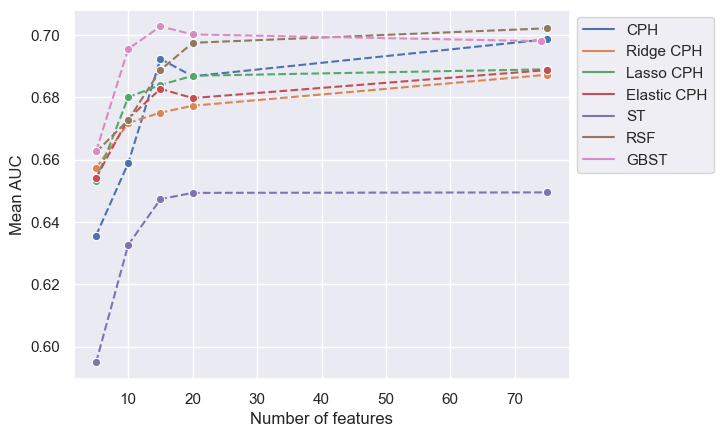

In [17]:

ax = sns.lineplot(temp,x="n_features",y='test_auc',hue='model',marker='o',linestyle ='--')
ax.set_xlabel('Number of features')
ax.set_ylabel('Mean AUC')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=model_labels,bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig("figures/model_auc_nfeatures.png",bbox_inches="tight")

# GBM

In [18]:
temp = results.query("model == 'gbm2' and n_features <=20")

C:\Users\harri\anaconda3\envs\tavi_survival\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\harri\anaconda3\envs\tavi_survival\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\harri\anaconda3\envs\tavi_survival\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


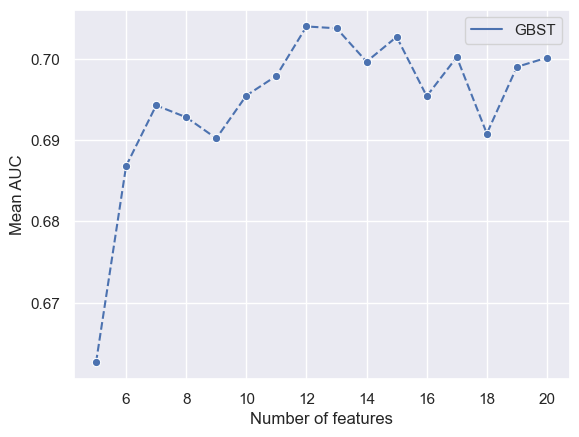

In [19]:
f, axs = plt.subplots(1, 1)
sns.lineplot(temp,x="n_features",y='test_auc',hue='model',marker='o',linestyle ='--',ax=axs)
axs.set_xlabel('Number of features')
axs.set_ylabel('Mean AUC')
handles, labels = ax.get_legend_handles_labels()
axs.legend(handles=handles, labels=['GBST'])
plt.savefig("figures/gbm_auc_nfeatures.png",bbox_inches="tight")

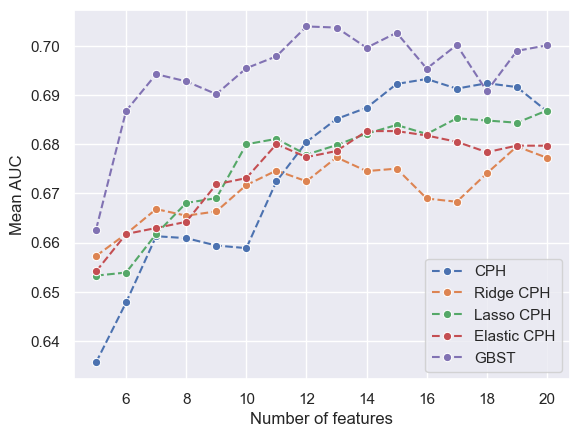

In [11]:
models = ["cph","ridge_cph","lasso_cph","elastic_cph","gbm2"]
model_labels = ['CPH','Ridge CPH','Lasso CPH','Elastic CPH','GBST']
temp = results.query("model in @models and n_features <=20")
f, axs = plt.subplots(1, 1)
sns.lineplot(temp,x="n_features",y='test_auc',hue='model',marker='o',linestyle ='--',ax=axs)
axs.set_xlabel('Number of features')
axs.set_ylabel('Mean AUC')
handles, labels = axs.get_legend_handles_labels()
axs.legend(handles=handles, labels=model_labels)
plt.savefig("figures/gbm_cph_auc_nfeatures.png",bbox_inches="tight")

In [12]:
def exponential_transformation_gender(row, column,gender_col, bounds, k=1):
    
    if row[gender_col] == 1:
        #male
        lower_bound, upper_bound = bounds["male"][0], bounds["male"][1]
    elif row[gender_col] == 0:
        lower_bound, upper_bound = bounds["female"][0], bounds["female"][1]
    else:
        return np.nan  # Unknown gender handling
    
    value = row[column]
    
    # Apply exponential transformation with scaling factor k
    if lower_bound <= value <= upper_bound:
        return 1  # Optimal range
    elif value < lower_bound:
        return np.exp(k * (lower_bound - value))  # Exponential penalty below range
    else:
        return np.exp(k * (value - upper_bound))  # Exponential penalty above range
def exponential_transformation(row, column, bounds, k=1):
    
    
    lower_bound, upper_bound = bounds[0], bounds[1]
    
    value = row[column]
    
    # Apply exponential transformation with scaling factor k
    if lower_bound <= value <= upper_bound:
        return 1  # Optimal range
    elif value < lower_bound:
        return np.exp(k * (lower_bound - value))  # Exponential penalty below range
    else:
        return np.exp(k * (value - upper_bound))  # Exponential penalty above range
def plot_auc(cph_auc,cph_mean_auc,times):
    plt.plot(times, cph_auc, "o-", label=f"Mean AUC = {cph_mean_auc:0.3f})")
    plt.axhline(cph_mean_auc, linestyle="--",color='r')
    plt.xlabel("days from enrollment")
    plt.ylabel("time-dependent AUC")
    plt.legend(loc="lower center")
    plt.grid(True)
    
from sksurv.metrics import cumulative_dynamic_auc
def calc_dyn_auc(model,X,y,y_train,time_max=365,time_interval=7):
    
    times = np.arange(1e-5, time_max, time_interval)
    chf_funcs = model.predict_cumulative_hazard_function(X)
    risk_scores = np.row_stack([chf(times) for chf in chf_funcs])
    auc, mean_auc = cumulative_dynamic_auc(y_train, y, risk_scores, times)

    return auc, mean_auc,times

In [13]:
# https://www.seslhd.health.nsw.gov.au/sites/default/files/2019-04/NSWHP%20Reference%20Ranges%20Adult%202019.pdf
train = pd.read_csv("train.csv",index_col = 0)



train['haemoglobin_adj'] = train.apply(exponential_transformation_gender, axis=1, k=2e-2,
                                      column='haemoglobin',gender_col='gender_2.0',
                                     bounds={'male':(130,170),'female':(120,150)})
train['creatinine_adj'] = train.apply(exponential_transformation_gender, axis=1, k=2e-3,
                                      column='creatinine',gender_col='gender_2.0',
                                     bounds={'male':(60,110),'female':(45,90)})
train['albumin_adj'] = train.apply(exponential_transformation, axis=1, k=1e-1,
                                      column='albumin',
                                     bounds=(33,48))
train['platelet_count_adj'] = train.apply(exponential_transformation, axis=1, k=4e-6,
                                      column='platelet_count',
                                     bounds=(150e3,450e3))
#train['inr_adj'] = train.apply(exponential_transformation, axis=1, k=0.5,
#                                      column='inr',
#                                     bounds=(0.8,1.1))

# https://cardiacmri.com/analysis-guide/aortic-valve-2/aortic-stenosis-2/ using mild as upperbound
train['av_peak_vel_adj'] = train.apply(exponential_transformation, axis=1, k=0.5,
                                      column='av_peak_vel',
                                     bounds=(1,3))

# https://cardiacmri.com/analysis-guide/aortic-valve-2/aortic-stenosis-2/ 
train['av_mean_grad_tte_adj'] = train.apply(exponential_transformation, axis=1, k=2e-2,
                                      column='av_mean_grad_tte',
                                     bounds=(0,20))

train['av_area_tte_adj'] = train.apply(exponential_transformation, axis=1, k=1,
                                      column='av_area_tte',
                                     bounds=(2,np.inf))
test = pd.read_csv("test.csv",index_col = 0)
test['haemoglobin_adj'] = test.apply(exponential_transformation_gender, axis=1, k=2e-2,
                                      column='haemoglobin',gender_col='gender_2.0',
                                     bounds={'male':(130,170),'female':(120,150)})
test['creatinine_adj'] = test.apply(exponential_transformation_gender, axis=1, k=2e-3,
                                      column='creatinine',gender_col='gender_2.0',
                                     bounds={'male':(60,110),'female':(45,90)})
test['albumin_adj'] = test.apply(exponential_transformation, axis=1, k=1e-1,
                                      column='albumin',
                                     bounds=(33,48))
test['platelet_count_adj'] = test.apply(exponential_transformation, axis=1, k=4e-6,
                                      column='platelet_count',
                                     bounds=(150e3,450e3))
#test['inr_adj'] = test.apply(exponential_transformation, axis=1, k=0.5,
#                                      column='inr',
#                                     bounds=(0.8,1.1))
test['av_peak_vel_adj'] = test.apply(exponential_transformation, axis=1, k=0.5,
                                      column='av_peak_vel',
                                     bounds=(1,3))
test['av_mean_grad_tte_adj'] = test.apply(exponential_transformation, axis=1, k=2e-2,
                                      column='av_mean_grad_tte',
                                     bounds=(0,20))

test['av_area_tte_adj'] = test.apply(exponential_transformation, axis=1, k=1,
                                      column='av_area_tte',
                                     bounds=(2,np.inf))
categorical_columns_to_keep = [
'gender_2.0', 'cad_1.0', 'prior_acute_mi_1.0', 'prior_cardio_surg_1.0',
       'prior_pci_1.0', 'prior_cabg_1.0', 'prior_valve_replace_1.0',
       'prior_bav_1.0', 'prior_af_1.0', 'prior_generator_1.0', 'prior_ccf_1.0',
       'prior_stroke_1.0', 'prior_tia_1.0', 'prior_carotid_sten_2.0',
       'prior_carotid_sten_3.0', 'prior_carotid_sten_4.0',
       'prior_carotid_sten_5.0', 'prior_pad_1.0', 'chronic_lung_2.0',
       'chronic_lung_3.0', 'chronic_lung_4.0', 'hypertension_1.0',
       'diabetes_1.0', 'ckd_1.0', 'dialysis_1.0', 'meds_ACE_ARB_1.0',
       'meds_aspirin_1.0', 'meds_p2y12_1.0', 'meds_beta_blocker_1.0',
       'meds_doac_1.0', 'meds_statins_1.0', 'meds_diuretics_1.0',
       'nyha_status_3.0', 
    'ecg_rhythm_sinus_1.0',
       'ecg_rhythm_Fibrillation_1.0', 'ecg_rhythm_paced_1.0',
       'ecg_conduct_none_1.0', 'ecg_conduct_RBBB_1.0', 'ecg_conduct_LBBB_1.0',
       'ecg_conduct_1DAVBlock_1.0', 
    'diseased_vessels_number_2.0',
       'diseased_vessels_number_3.0', 'diseased_vessels_number_4.0',
       'prox_lad_1.0', 'aortic_insuff_2.0', 'aortic_insuff_3.0',
       'aortic_insuff_4.0', 'mitral_regurg_1.0', 'av_disease_etiology_2.0',
       'valve_calc_1.0', 'annualar_calc_ctaort_1.0', 'valve_morph_1.0',
       'artery_calc_2.0', 'artery_calc_3.0',
    'artery_calc_4.0',
       'iliofem_tort_2.0', 'iliofem_tort_3.0', 'iliofem_tort_4.0',
       'high_cfa_burif_1.0', 
    #'prev_iliofem_interv_1.0', 
    'procedure_indic_1.0',
       #'valve_in_valve_1.0', 
    'anaesthesia_2.0', 'anaesthesia_4.0',
       'initial_bav_1.0'
    ] 
    #'device_manufacturer_1_2.0',
       #'device_manufacturer_1_3.0',
        #'lvef_value_scale_2.0',
#'lvef_value_scale_3.0',
#'lvef_value_scale_4.0']
cont_columns_to_keep = [
    #'haemoglobin',
    'haemoglobin_adj',
    #'platelet_count',
    'platelet_count_adj',
    #'albumin',
    'albumin_adj',
    'creatinine',
    #'creatinine_adj',
    'lvef_value',
    'av_peak_vel',	
    #'av_peak_vel_adj',
    'av_mean_grad_tte',	
    #'av_mean_grad_tte_adj',
    'av_area_tte',	
    #'av_area_tte_adj',
    'weight',
    'age',
    'kccq_summ_bl',
]
outcome_columns = ['death_in_study','upper_bound',
                       'discharge_status_new','fup_status_30d_new', 'fup_status_12mth_new','lower_bound','death_observed',
                  'event_observed', 'event_max','event_min','event_mid']

X_train = train.drop(outcome_columns,axis=1)
X_train = X_train.drop(["egfr_pre"],axis=1)

y = train[["death_in_study","event_max" ]]

records = y.to_records(index=False)
y_train = np.array(records, dtype = records.dtype.descr)


X_test = test.drop(outcome_columns,axis=1)
X_test = X_test.drop(["egfr_pre"],axis=1)
X_test = X_test[list(categorical_columns_to_keep) + cont_columns_to_keep]
#X_test = X_test.loc[:,column_list]
#X_test_scale = scaler.transform(X_test)
#X_test_scale = pd.DataFrame(X_test_scale,columns=X_test.columns,index=test.index)

y_test = test[["death_in_study","event_max" ]]

records = y_test.to_records(index=False)
y_test = np.array(records, dtype = records.dtype.descr)

In [14]:

print(df.shape)
print(train.shape)
print(test.shape)

(16123, 130)
(12898, 118)
(3225, 118)


In [15]:
model = pickle.load(open("model/gbm2_{}_nfeatures{}.pkl".format(today_stf,12),"rb"))
chosen_model = model.best_estimator_

with open("model/gbm_final_1.pkl".format(today_stf), "wb") as f:
    pickle.dump(chosen_model, f, protocol=5)

FileNotFoundError: [Errno 2] No such file or directory: 'model/gbm2_20241022_nfeatures12.pkl'

In [18]:
import joblib
chosen_model = joblib.load("model/gbm_final_1.pkl")

D:\Program Files\anacondav2\envs\tavi_survival\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
D:\Program Files\anacondav2\envs\tavi_survival\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.5.1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
D:\Program Files\anacondav2\envs\tavi_survival\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from 

In [10]:
auc, mean_auc,times = calc_dyn_auc(chosen_model,X_test[chosen_model.feature_names_in_],y_test,y_train,365,7)

In [48]:
chosen_model.feature_names_in_

array(['kccq_summ_bl', 'age', 'haemoglobin_adj', 'creatinine', 'weight',
       'albumin_adj', 'prior_af_1.0', 'lvef_value', 'av_area_tte',
       'prior_pad_1.0', 'chronic_lung_4.0', 'chronic_lung_3.0'],
      dtype=object)

C:\Users\harri\AppData\Local\Temp\ipykernel_22708\868260419.py:1: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(times, auc, "o-",linestyle="--")


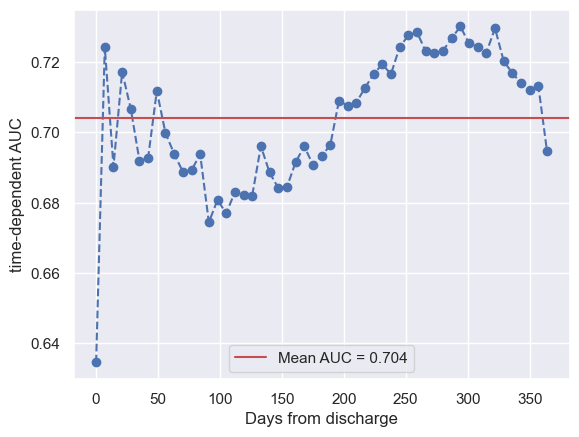

In [11]:
plt.plot(times, auc, "o-",linestyle="--")
plt.axhline(mean_auc, linestyle="-",color='r', label=f"Mean AUC = {mean_auc:0.3f}")
plt.xlabel("Days from discharge")
plt.ylabel("time-dependent AUC")
plt.legend(loc="lower center")
#plt.savefig("figures/gbm_dynamic_auc.png",bbox_inches="tight")

#### Comparison against CPH

In [23]:
import joblib
chosen_model = joblib.load("model/gbm_final_1.pkl")
auc, mean_auc,times = calc_dyn_auc(chosen_model,X_test[chosen_model.feature_names_in_],y_test,y_train,365,7)
cph_chosen_model = joblib.load("model/cph_20241022_nfeatures16.pkl")
cph_auc, cph_mean_auc,times = calc_dyn_auc(cph_chosen_model,X_test[cph_chosen_model.feature_names_in_],y_test,y_train,365,7)

D:\Program Files\anacondav2\envs\tavi_survival\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
D:\Program Files\anacondav2\envs\tavi_survival\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.5.1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
D:\Program Files\anacondav2\envs\tavi_survival\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from 

C:\Users\Harrison Nguyen\AppData\Local\Temp\ipykernel_928\574505066.py:1: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(times, auc, "o-",linestyle="--", label=f"GBST")
C:\Users\Harrison Nguyen\AppData\Local\Temp\ipykernel_928\574505066.py:3: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(times, cph_auc, "o-",linestyle="--",color='g', label=f"CPH")


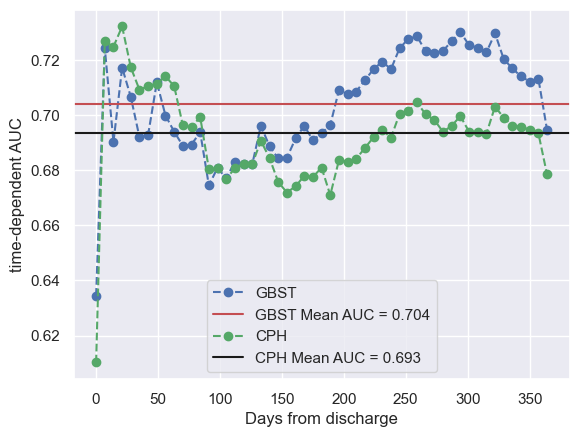

In [30]:

plt.plot(times, auc, "o-",linestyle="--", label=f"GBST")
plt.axhline(mean_auc, linestyle="-",color='r', label=f"GBST Mean AUC = {mean_auc:0.3f}")
plt.plot(times, cph_auc, "o-",linestyle="--",color='g', label=f"CPH")
plt.axhline(cph_mean_auc, linestyle="-",color='k', label=f"CPH Mean AUC = {cph_mean_auc:0.3f}")
plt.xlabel("Days from discharge")
plt.ylabel("time-dependent AUC")
plt.legend(loc="lower center")
plt.savefig("figures/gbm_cph_dynamic_auc.png",bbox_inches="tight")

### Survival plot

In [36]:
survival_times = model.best_estimator_.predict_survival_function(X_test.loc[[394,12648],chosen_model.feature_names_in_])

In [49]:
X_test.loc[[394,12648],chosen_model.feature_names_in_]

,kccq_summ_bl,age,haemoglobin_adj,creatinine,weight,albumin_adj,prior_af_1.0,lvef_value,av_area_tte,prior_pad_1.0,chronic_lung_4.0,chronic_lung_3.0
ID,,,,,,,,,,,,
394,49.527788,73.0,1.0,64.0,100.0,1.0,1.0,4.110874,1.00,0.0,0.0,0.0
12648,36.132890,82.0,1.0,67.0,111.0,1.0,0.0,4.110874,0.99,0.0,0.0,0.0


In [46]:
year_index = np.where(survival_times[0].x == 365)[0][0]

In [47]:
survival_times[0].y[year_index]

0.9673831681590455

C:\Users\harri\anaconda3\envs\tavi_survival\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\harri\anaconda3\envs\tavi_survival\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\harri\anaconda3\envs\tavi_survival\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\harri\anaconda3\envs\tavi_survival\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

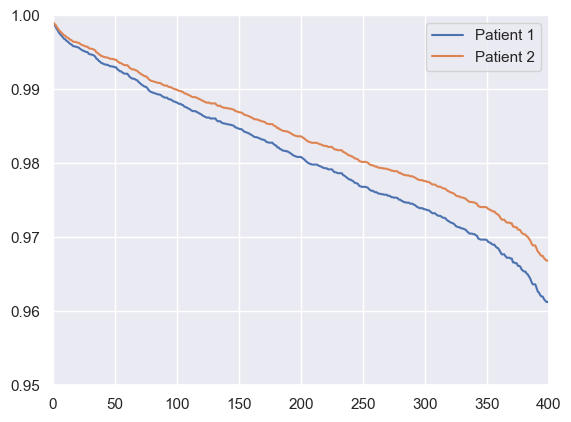

In [27]:
ax = sns.lineplot(x=survival_times[0].x,y=survival_times[0].y,label='Patient 1')
ax = sns.lineplot(x=survival_times[1].x,y=survival_times[1].y,label='Patient 2')
ax.set_xlim([0,400])
ax.set_ylim([0.95,1])
plt.savefig("figures/gbm_patient_survival_curve.png",bbox_inches="tight")

## Feature importance

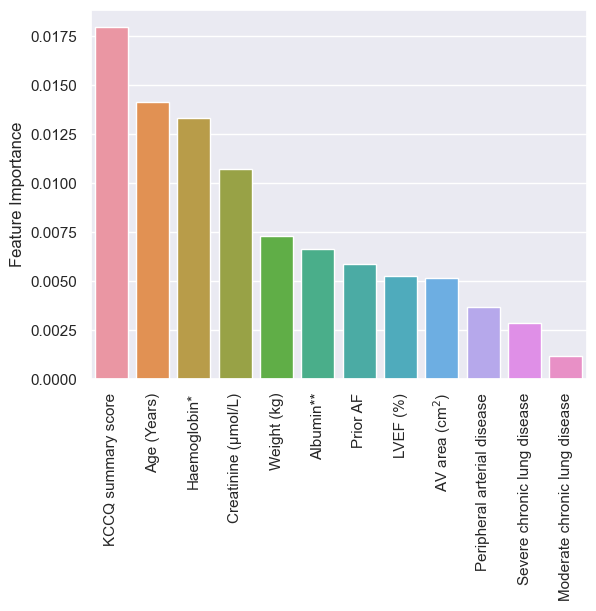

In [53]:
gbm_feature_importance = pd.read_csv("results/gbm2_feature_importance_{}.csv".format(today_stf),index_col=0)
non_zero_rf_fi = gbm_feature_importance.head(12)
ax = sns.barplot(non_zero_rf_fi, y = 'importances_mean',x=non_zero_rf_fi.index)
temp = plt.setp(ax.get_xticklabels(), rotation=90,horizontalalignment = 'center')
ax.set_ylabel('Feature Importance')
ax.set_xticklabels(['KCCQ summary score','Age (Years)','Haemoglobin*','Creatinine (μmol/L)','Weight (kg)',
                   'Albumin**','Prior AF','LVEF (%)',
                   'AV area (cm$^2$)','Peripheral arterial disease','Severe chronic lung disease',
                   'Moderate chronic lung disease'])
plt.savefig("figures/gbm_coeff_plot.png",bbox_inches="tight")